## Setup

### Load packages

In [1]:
#install.packages("PreProcess")
suppressPackageStartupMessages({
    library(ggplot2)
    library(dplyr)
    library(statsr)
    library(GGally)
    library(gridExtra)
})

### Load data

Make sure your data and R Markdown files are in the same directory. When loaded
your data file will be called `movies`. Delete this note when before you submit 
your work. 

In [2]:
load("movies.Rdata")

## Part 1: Data

The dataset consists of 651 randomly sampled movies. Based on this assumption about the sampling, we can accept the generalizability of the inferences done during the current study. Since movies are randomly sampled, there are no bias caused by `genre`, `actors`, `studio` among others. We will also assume that the samples are independent between each other, which is also quite plausible considering the sample randomness.

As previously commented, since the samples are randomly selected, we can assume causality in the correlations obtained. For so, the confounding variables should have been distributed uniformly between classes.

### A Quick Look to the Dataset

Let's take a first look at the dataset that will be used for the Explanatory Data Analysis (EDA) and the following modelling. We will start having a look at the first observations. As it can also be observed the dataset consists of 651 observations and 32 features.

In [3]:
dim(movies)
head(movies, 5)

[1] 651  32

title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,⋯,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,⋯,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,⋯,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
Waiting for Guffman,Feature Film,Comedy,84,R,Sony Pictures Classics,1996,8,21,2001,⋯,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,⋯,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
Malevolence,Feature Film,Horror,90,R,Anchor Bay Entertainment,2004,9,10,2005,⋯,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


Next, let's take a look at the variable types in the dataset. This will help us determine which features may be used to generate a Multiple Linear Regression (MLR) model.

In [4]:
str(movies)

tibble [651 × 32] (S3: tbl_df/tbl/data.frame)
 $ title           : chr [1:651] "Filly Brown" "The Dish" "Waiting for Guffman" "The Age of Innocence" ...
 $ title_type      : Factor w/ 3 levels "Documentary",..: 2 2 2 2 2 1 2 2 1 2 ...
 $ genre           : Factor w/ 11 levels "Action & Adventure",..: 6 6 4 6 7 5 6 6 5 6 ...
 $ runtime         : num [1:651] 80 101 84 139 90 78 142 93 88 119 ...
 $ mpaa_rating     : Factor w/ 6 levels "G","NC-17","PG",..: 5 4 5 3 5 6 4 5 6 6 ...
 $ studio          : Factor w/ 211 levels "20th Century Fox",..: 91 202 167 34 13 163 147 118 88 84 ...
 $ thtr_rel_year   : num [1:651] 2013 2001 1996 1993 2004 ...
 $ thtr_rel_month  : num [1:651] 4 3 8 10 9 1 1 11 9 3 ...
 $ thtr_rel_day    : num [1:651] 19 14 21 1 10 15 1 8 7 2 ...
 $ dvd_rel_year    : num [1:651] 2013 2001 2001 2001 2005 ...
 $ dvd_rel_month   : num [1:651] 7 8 8 11 4 4 2 3 1 8 ...
 $ dvd_rel_day     : num [1:651] 30 28 21 6 19 20 18 2 21 14 ...
 $ imdb_rating     : num [1:651] 5.5 7.3 7.6 7.

## Part 2: Research question

An important factor to choose a movie, are the comments and the score left by others. Does the critic score affects the audience score? are somehow correlated between them? Are the professional movie critics biased by their own point of view?

In this project we will try to determine if there are features (explanatory variables) which might predict the movie score based on audience ratings in [Rotten Tomatoes](https://www.rottentomatoes.com/). Or if in the other case, there are no elements (at least in the dataset) which might contribute to the audience ranking.

Based on the discussion held in the previous paragraphs, our research question is:

- Is/Are there any feature/s which might explain the `audience_score`?

## Part 3: Exploratory data analysis
 
The dataset has several features, however not all of them have predictivness power, e.g.: There are several features of character type, such as the title name, and the name of the actors. Maybe, there is something there that can be feature engineered, but it won't be the first try. 

We'll start cleaning and organizing the dataset in order to further analyze the data and make a model which can be useful for predictions.

### Data cleaning

Our cleaning process consist of:
- Removing missing data
- Make a new feature which is actually the mean between `imdb_rating` and the rotten tomatoes' `critics_score`.

In [5]:
movies_cln <- movies %>%
        filter(!is.na(thtr_rel_year),!is.na(runtime), !is.na(imdb_rating),
               !is.na(critics_score), !is.na(audience_score), !is.na(title_type),
               !is.na(genre), !is.na(mpaa_rating), !is.na(studio), !is.na(dvd_rel_year),
               !is.na(best_pic_nom), !is.na(best_actor_win), !is.na(best_actress_win), 
               !is.na(best_dir_win), !is.na(top200_box))

In [6]:
movies_cln <- movies_cln %>%
    mutate(imdb_rating_n = (imdb_rating - min(imdb_rating))/
           (max(imdb_rating)-min(imdb_rating))) %>%
    mutate(critics_score_n = (critics_score - min(critics_score))/
           (max(critics_score)-min(critics_score)))

Finally, we'll dump some auxiliary features used to construct `critics_mean` and take a quick look to the first elements of the cleaned dataset after the munging process.

In [7]:
movies_cln$critics_mean <- rowMeans(movies_cln[,c('imdb_rating_n', 'critics_score_n')], na.rm=TRUE)
movies_cln <- movies_cln %>%
    select(-c('imdb_rating_n', 'critics_score_n'))

head(movies_cln,5)

title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,⋯,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url,critics_mean
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,⋯,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/,0.4757433
The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,⋯,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/,0.8600797
Waiting for Guffman,Feature Film,Comedy,84,R,Sony Pictures Classics,1996,8,21,2001,⋯,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/,0.8559539
The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,⋯,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/,0.7722293
Malevolence,Feature Film,Horror,90,R,Anchor Bay Entertainment,2004,9,10,2005,⋯,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/,0.3869683


### Plots

Now with the dataset cleaned we can carry on plotting some features, find collinear variables, put the dots in a scatterplot to analyze -at least preliminary- the features distribution vs. our target variable. R has an excellent function: `ggpairs` to tackle this task.

In [8]:
options(repr.plot.width=10, repr.plot.height=8)

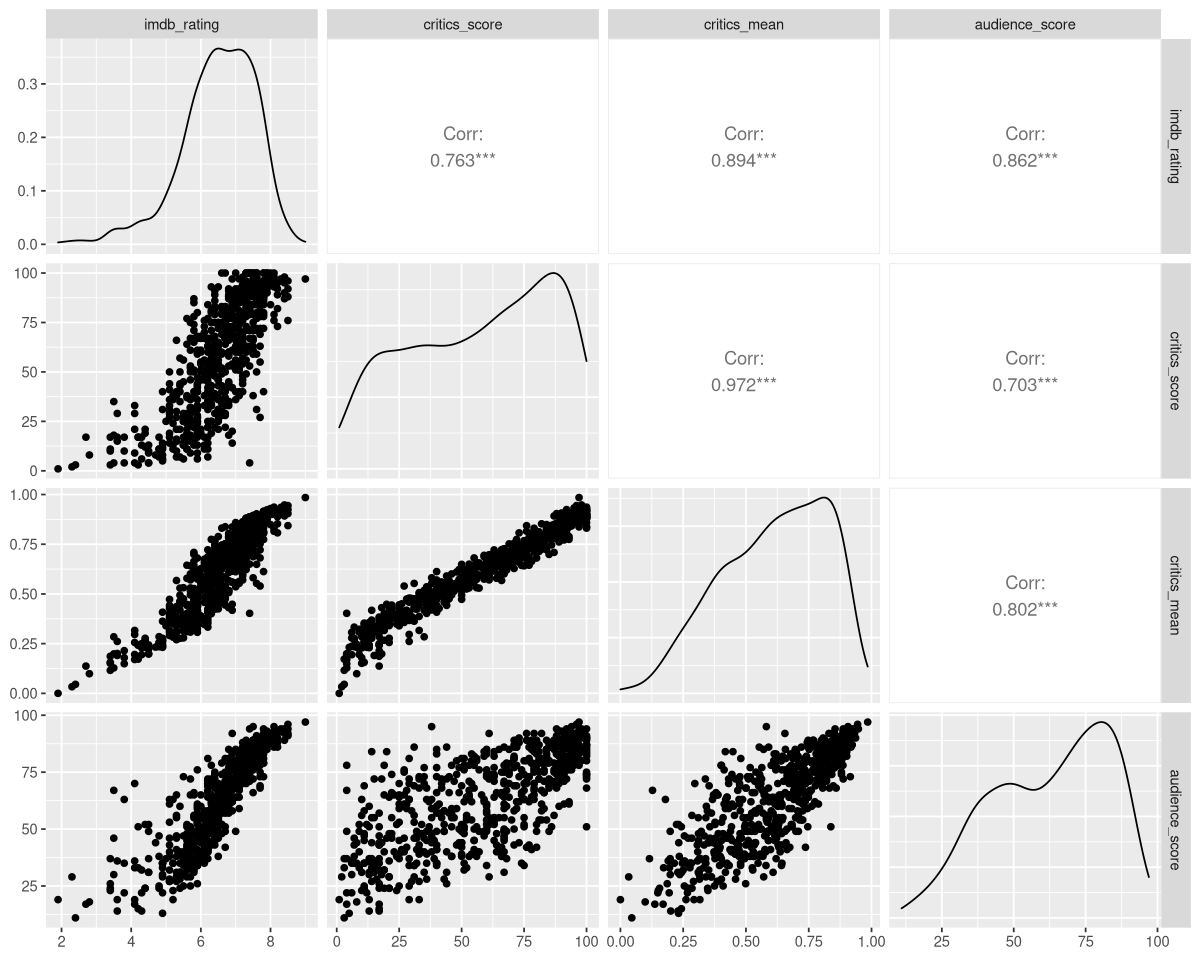

In [9]:
movies_cln %>%
    ggpairs(columns=c('imdb_rating', 'critics_score', 'critics_mean', 'audience_score'))

There are 3 features in the dataset linked with movie scores:
- imdb rating
- critics score (from Rotten Tomatoes)
- audience score (our target variable)

The first thing to notice here is that among them there exists a high collinearity. Hence, we should only pick one as a predictor and take ou the rest. Also notice that `critics mean` has less dispersion, and at the same time is collinear with the other two variables. Naturally is highly collinear with `critics_score`.

Does the year of release has something to do with the audience score? Let's check it out.

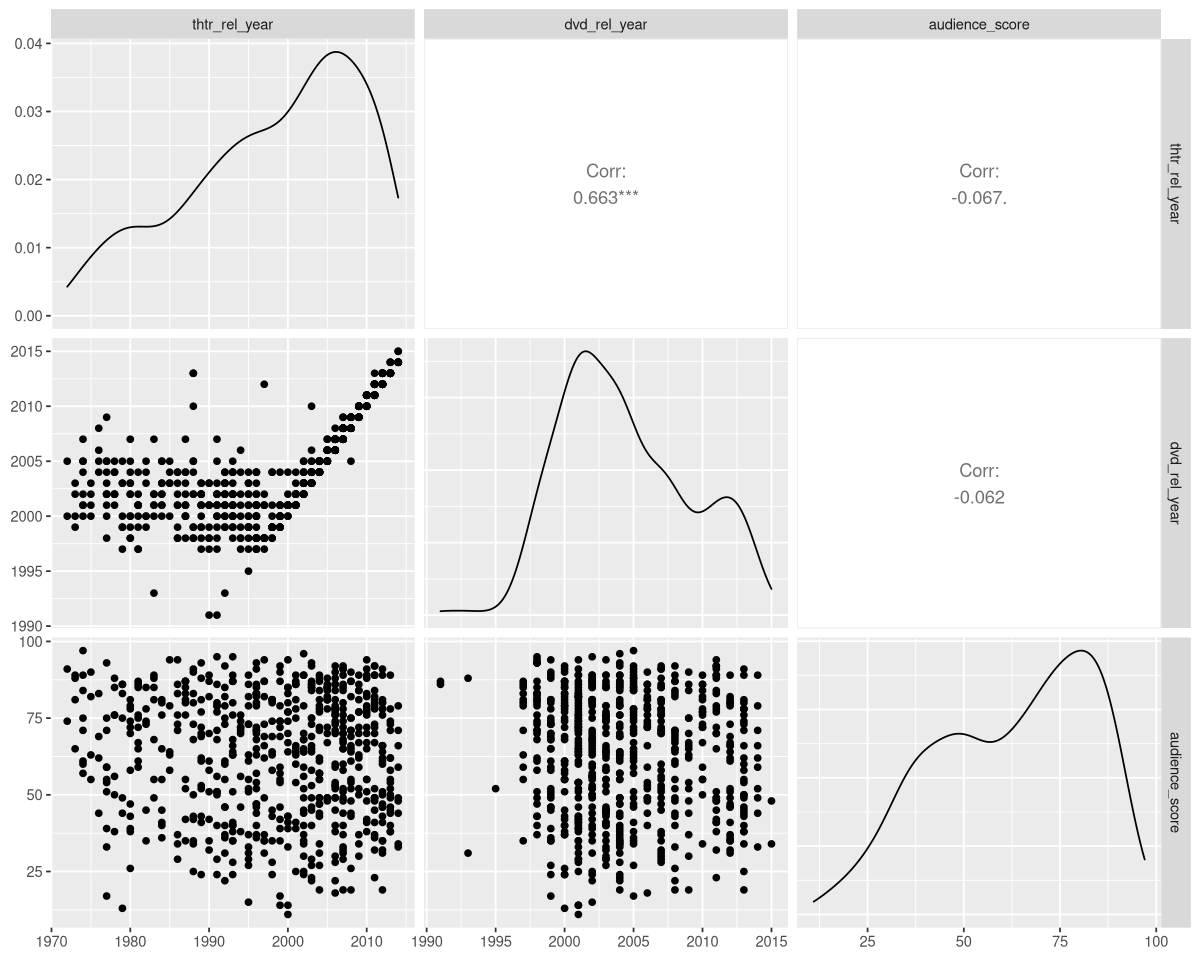

In [10]:
movies_cln %>%
    ggpairs(columns=c('thtr_rel_year', 'dvd_rel_year', 'audience_score'))

As we can see, there is no high correlation with our target variable at all. However, is interesting to see in the plots, how highly correlated are the DVD and theater releases. Clearly this is notable after about 2000, when DVD became more mainstream.

Let's now take a look at the different genres. Does a genre in particular has something to do with the audience score? Do the mainstream public have genre preferences?

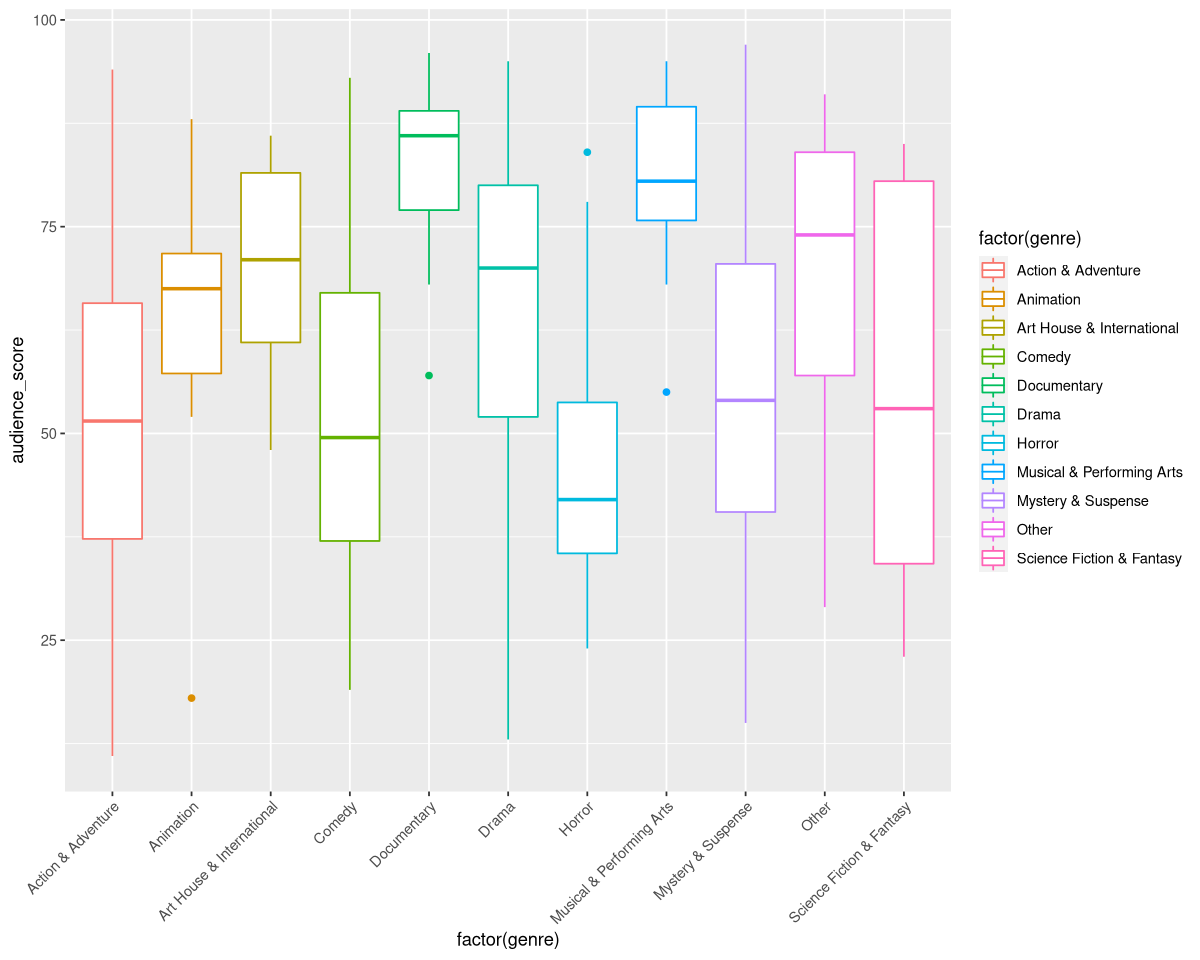

In [11]:
ggplot(movies_cln, aes(x=factor(genre), y=audience_score, colour=factor(genre))) +
        geom_boxplot() + theme(axis.text.x = element_text(angle=45, hjust=1))

Clearly, there are genres better scored than others, even without an `ANOVA` test, their median differences are significant.

Surprisingly, Documentary films rank very well with a small boxplot indicating low scoring dispersion. Also, Musical & Performing Arts ranks pretty well. We'll see later how the weights of the MLR model weighs the genres in particular.

Let's take a look now to other predictor, which somehow might be linked to the movie score. The `top200_box` tells whether the movie is in the Top 200 Box Office list. This is a natural classifier and we should expect that those listed in this ranking score better.

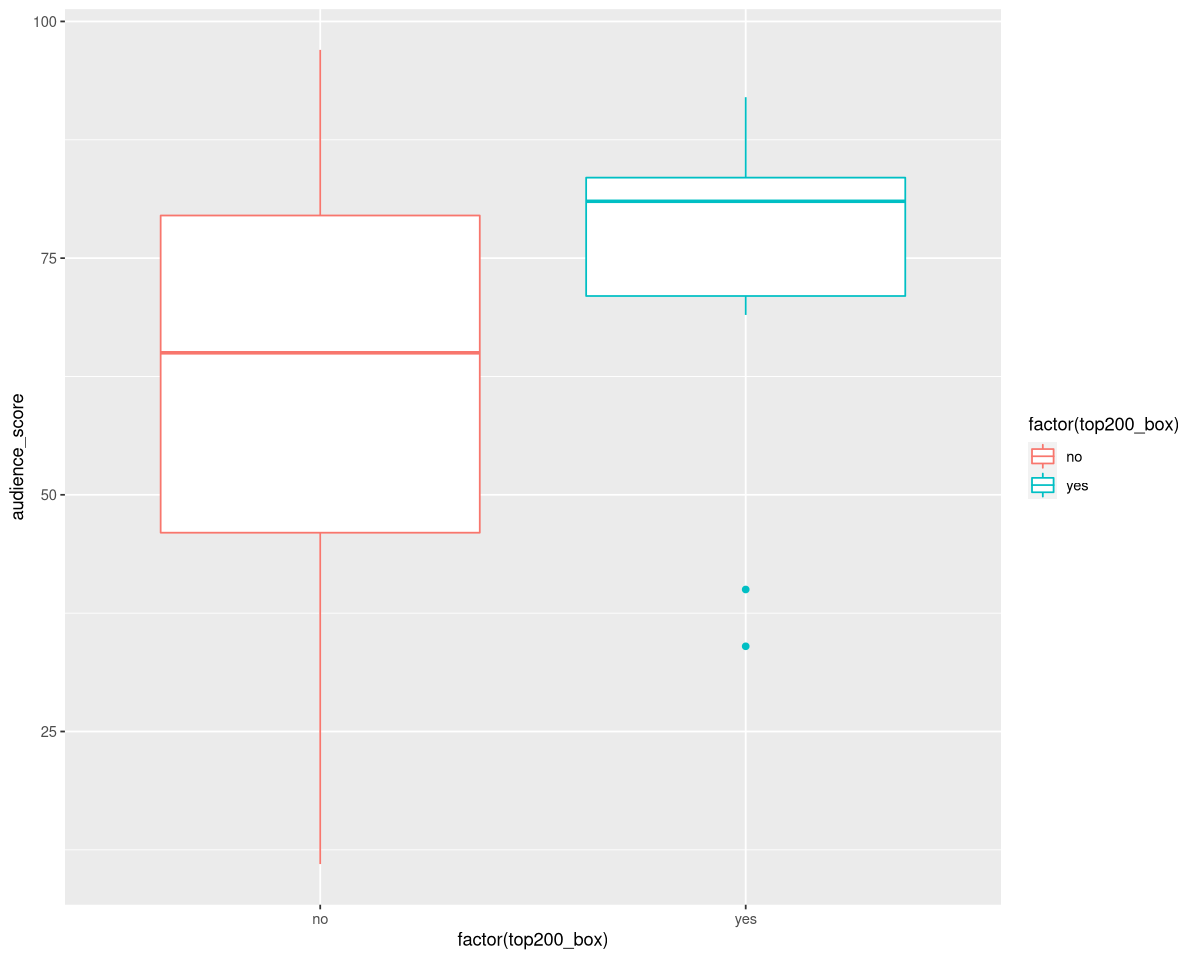

In [12]:
ggplot(movies_cln, aes(x=factor(top200_box), y=audience_score, colour=factor(top200_box))) +
        geom_boxplot()

As expected, the boxplots show clear evidence of better scoring perfomance for those listed in the Top 200 Box Office list. Not only the mean is higher, but the variance (based on interquartile range) is lower.

Let's now take a look at award as score predictors. Particularly we'll analyze the following features in the same fashion as the previous variable:

- `best_pic_win`: Whether or not the movie won a best picture Oscar (no, yes)
- `best_dir_win`: Whether or not the director of the movie **ever** won an Oscar (no, yes)
- `best_actor_win`: Whether or not one of the main actors in the movie **ever** won an Oscar (no, yes)
- `best_actress_win`: Whether or not one of the main actresses in the movie **ever** won an Oscar (no, yes)

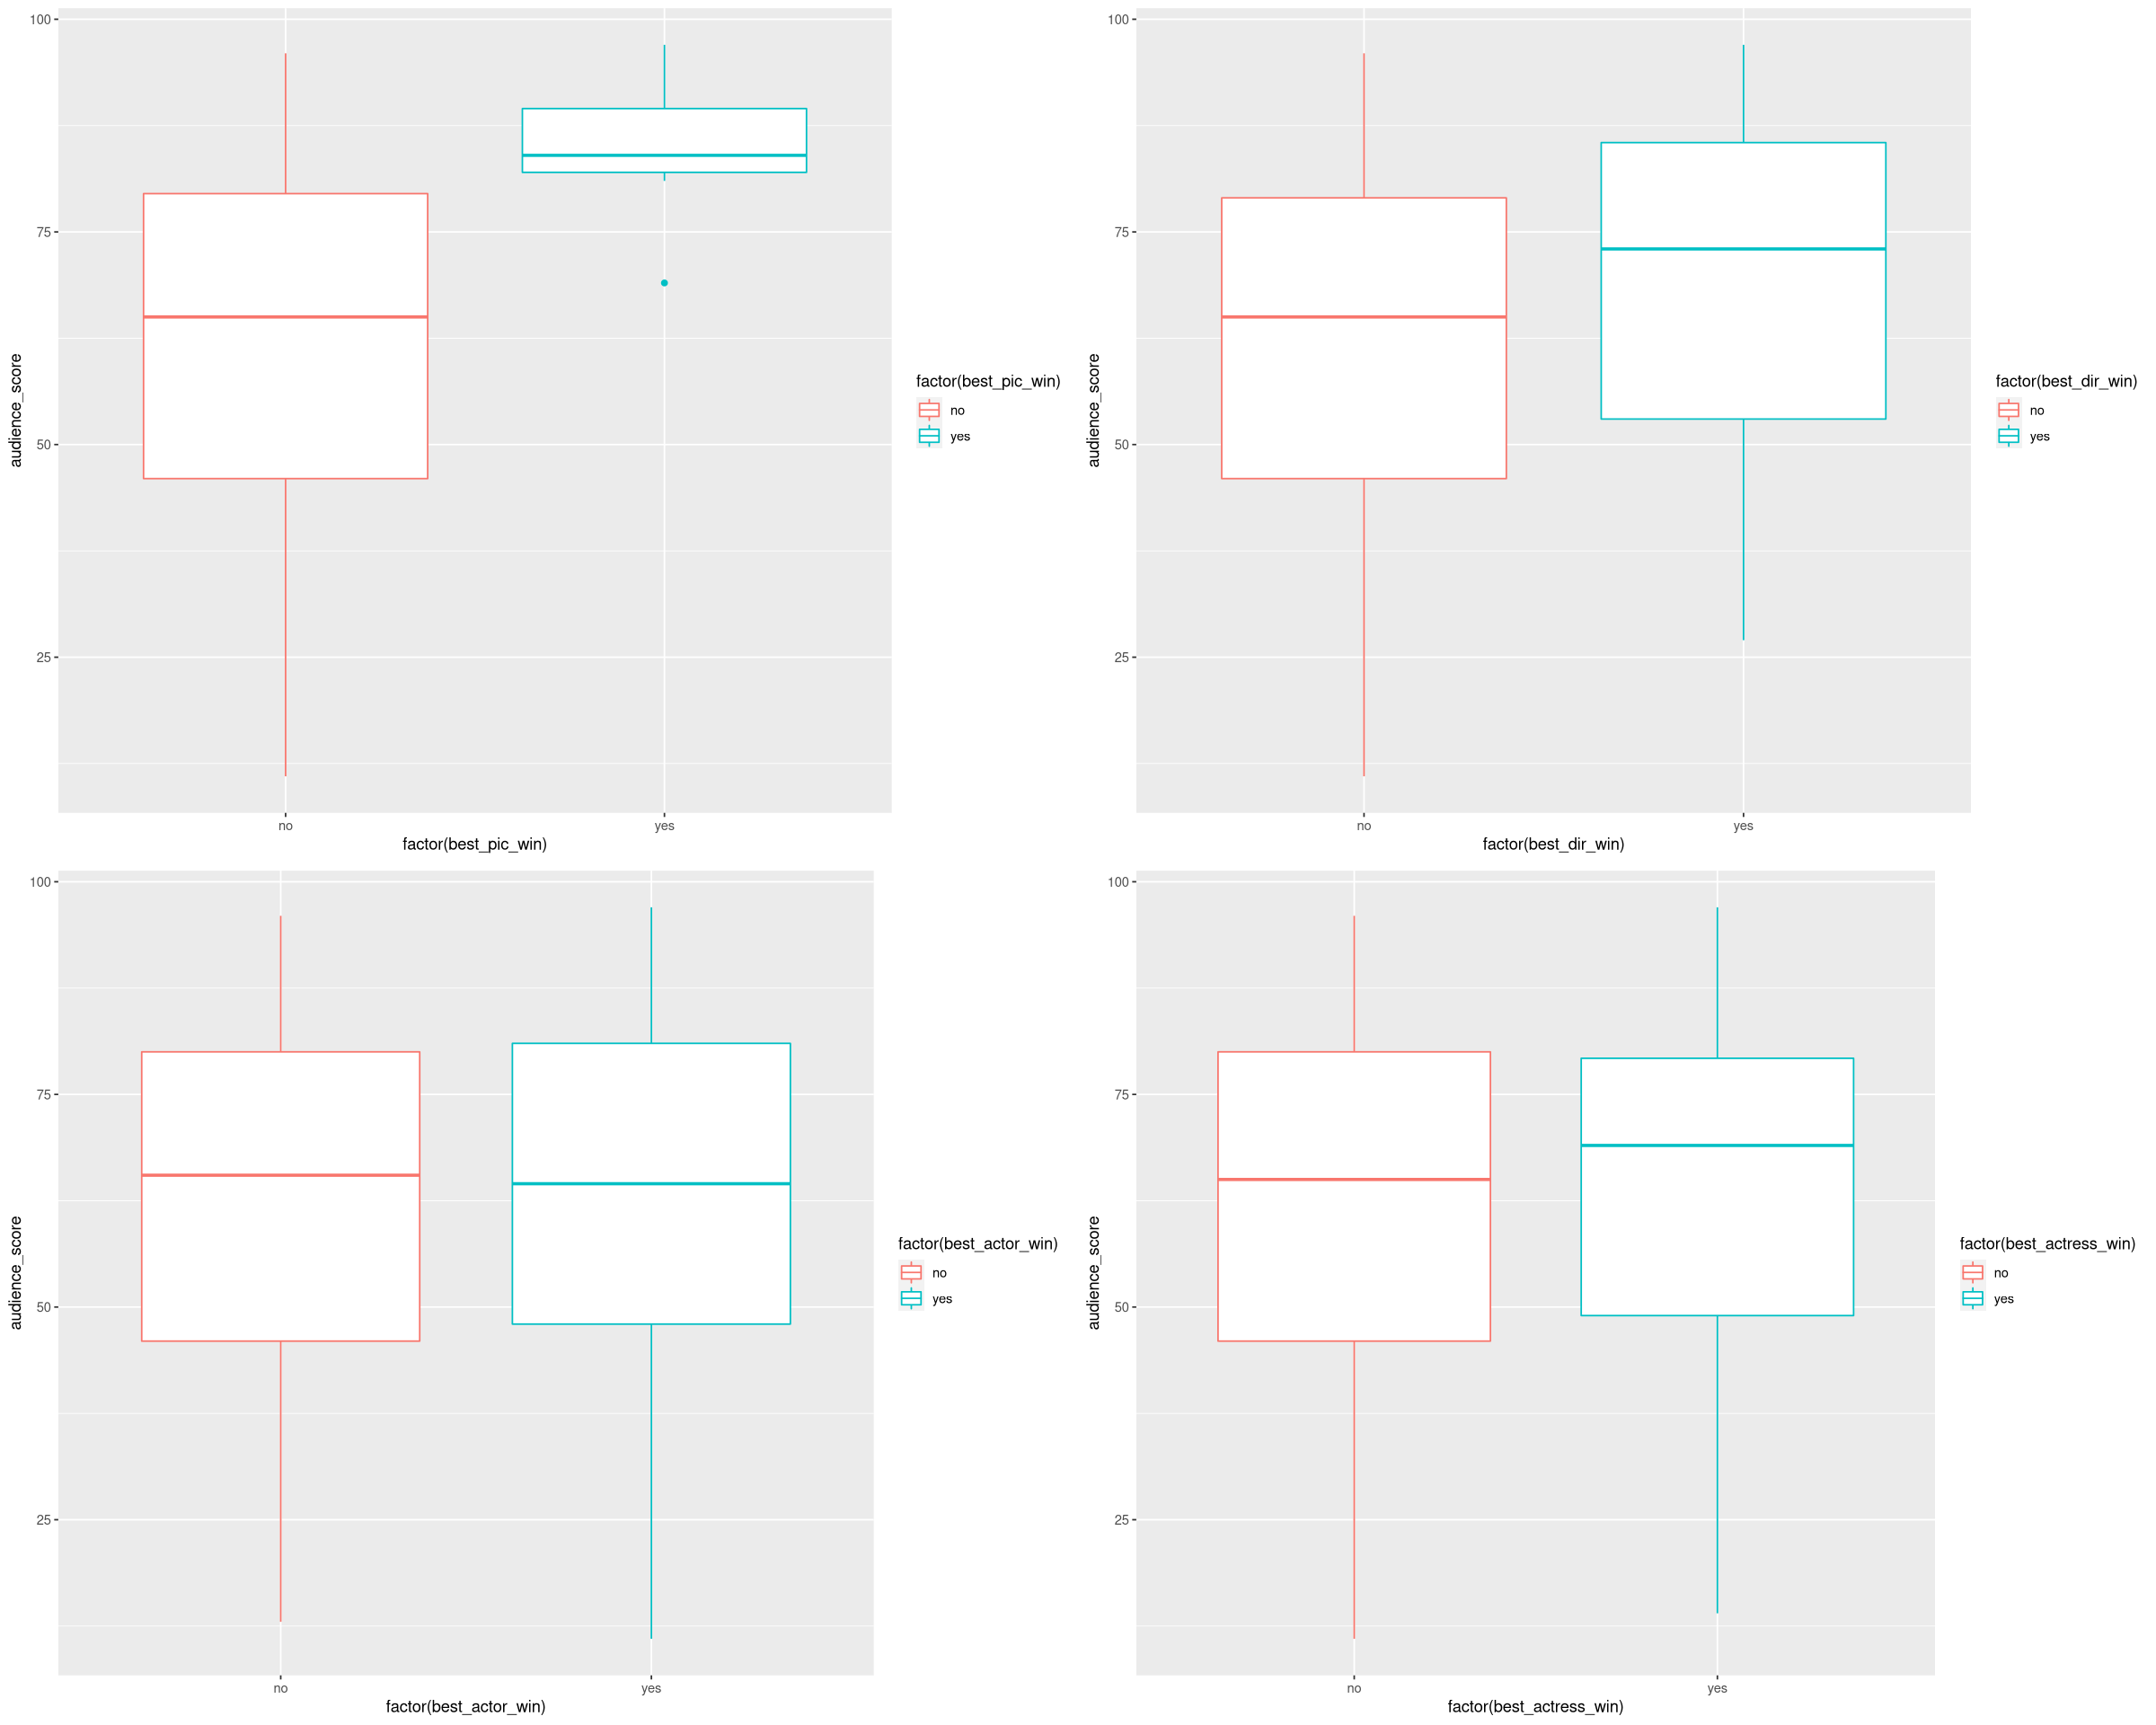

In [13]:
options(repr.plot.width=20, repr.plot.height=16)
best_pic_plot <- ggplot(movies_cln, aes(x=factor(best_pic_win), y=audience_score, colour=factor(best_pic_win))) +
        geom_boxplot()

best_actor_plot <- ggplot(movies_cln, aes(x=factor(best_actor_win), y=audience_score, colour=factor(best_actor_win))) +
        geom_boxplot()

best_actress_plot <- ggplot(movies_cln, aes(x=factor(best_actress_win), y=audience_score, colour=factor(best_actress_win))) +
        geom_boxplot()

best_dir_plot <- ggplot(movies_cln, aes(x=factor(best_dir_win), y=audience_score, colour=factor(best_dir_win))) +
        geom_boxplot()

grid.arrange(best_pic_plot, best_dir_plot, best_actor_plot, best_actress_plot, nrow = 2)

As it can be seen, not all of these factors have predictive power. Seems like those movies who have won the best picture Oscar may rank better. Awarded directors tend to be better scored, but a statistical analysis needs to be done to determine significance. We'll do that in a single shot while making the model.

Let's finally take a look at the `audience score` distribution

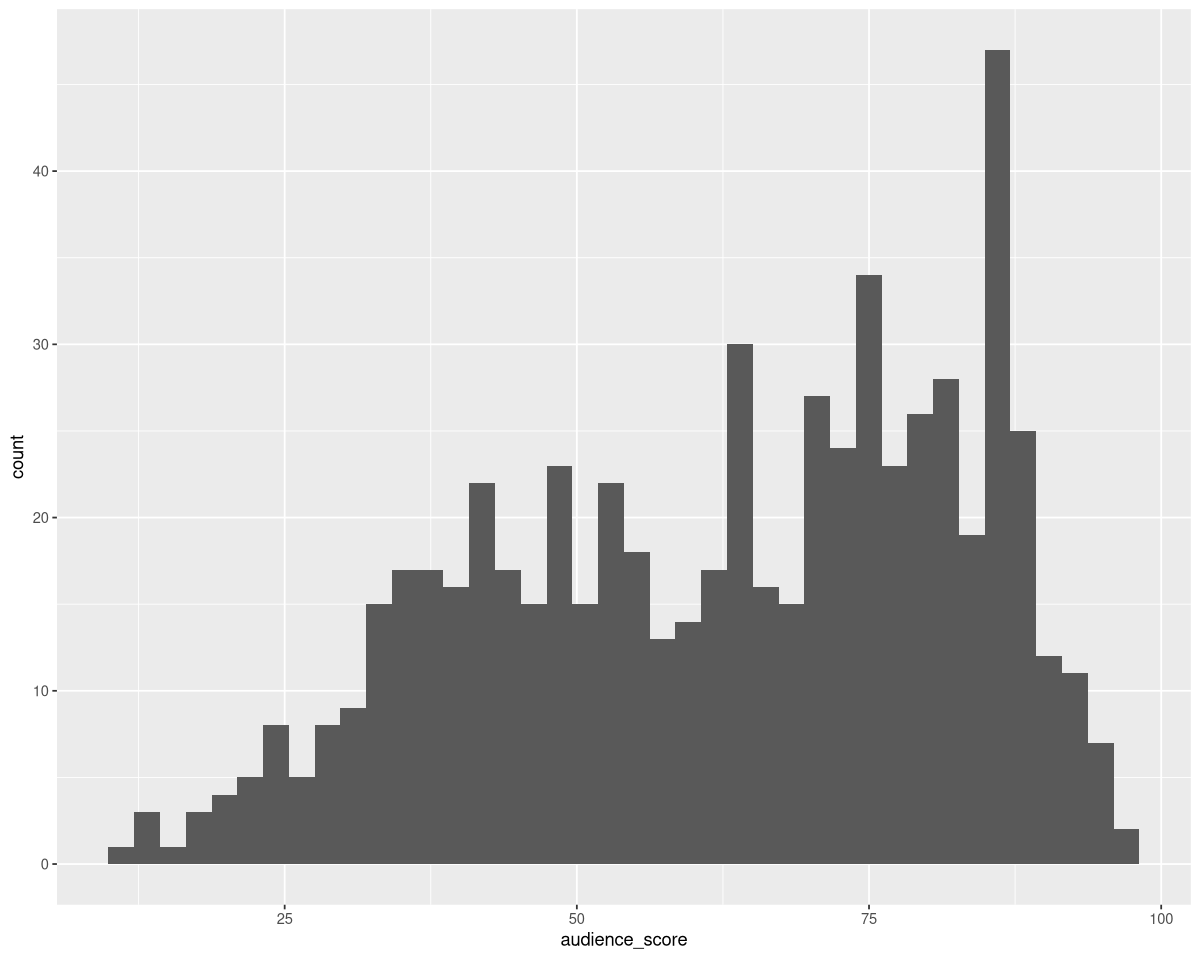

In [14]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(movies_cln, aes(x=audience_score)) + geom_histogram(bins=40)

The distribution seems to be left skewed, indicating that users tend to rank movies with a score higher than 50 in average. There seems to be a multimodal distribution, with partial means around 45 and 77. 

We'll execute some summary statistics to have a better understanding of the dataset's score values in the following section.

### Summary Statistics

As mentioned before, let's execute some summary statistics in our target variable to understand it a bit more.

In [15]:
summary(movies_cln$audience_score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   46.00   65.00   62.59   80.00   97.00 

As noticed from the plots, the distribution is slighltly left skewed and centered above the half scale. Most of the scores are distributed between 46 and 80.

Let's now take a look at those studios who have contributed more to the movie industry based on the dataset sample.

In [16]:
studios <- movies_cln %>%
    group_by(studio) %>%
    summarise(count = n()) %>% 
    arrange(desc(count)) %>%
    slice(seq_len(15))
studios

studio,count
<fct>,<int>
Paramount Pictures,37
Warner Bros. Pictures,30
Sony Pictures Home Entertainment,27
Universal Pictures,23
Warner Home Video,19
Miramax Films,18
20th Century Fox,17
MGM,15
Twentieth Century Fox Home Entertainment,14


Not surprisingly, the top studios are big names in the film industry

### EDA Observations

To recap a bit about the work done so far, we can state that:
- There are several collinear variables where we have to take care to avoid a biased model.
- We've found some features which will be clearly removed from the modelling due to the lack of predectiveness.
- Genres look promising as an estimator of the audience score, as we've seen.
- Best picture awarded movies also rank higher than average.

## Part 4: Modeling

We'll start with a big model full of predictors, and we'll remove them one by one until we reach the highest R$_{adj}^2$. Even if we're inserting collinear variables in the beginning itś interesting to see the effect as they are being removed. The variables that will be included are:

- title_type 
- genre
- runtime
- mpaa_rating
- imdb_rating
- critics_rating
- critics_score 
- best_pic_win 
- best_actor_win 
- best_actress_win 
- best_dir_win 
- top200_box
- critics_mean

Many of the variables excluded correspond to the ones which are of string type, such as the title name, and the name of the actors. Maybe, there is something that can be feature engineered, but it won't be our first try.

In [17]:
m_full <- lm(audience_score ~ title_type + genre + runtime + mpaa_rating + 
             imdb_rating + critics_rating + critics_score + best_pic_win +
             best_actor_win + best_actress_win + best_dir_win + top200_box +
             critics_mean, data = movies_cln)
summary(m_full)


Call:
lm(formula = audience_score ~ title_type + genre + runtime + 
    mpaa_rating + imdb_rating + critics_rating + critics_score + 
    best_pic_win + best_actor_win + best_actress_win + best_dir_win + 
    top200_box + critics_mean, data = movies_cln)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.308  -5.983   0.777   5.530  49.354 

Coefficients: (1 not defined because of singularities)
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -33.732694   6.474114  -5.210 2.59e-07 ***
title_typeFeature Film           4.631251   3.966971   1.167  0.24349    
title_typeTV Movie               5.610776   6.329738   0.886  0.37575    
genreAnimation                   9.682044   4.039140   2.397  0.01683 *  
genreArt House & International   0.914445   3.221718   0.284  0.77663    
genreComedy                      2.415477   1.682996   1.435  0.15174    
genreDocumentary                 5.234825   4.164894   1.257  0.20928    
ge

As mentioned before, starting from a full model and removing one variable at a time help us determine which are the features with the highest predictability and remove those who don't. This technique is also known as backwards selection/elimination. The final objective is to obtain a `parsimonius` model with the least collinearity possible.

After several iterations, removing the features with the highest p-value (`Pr(>|t|)`) the parsimonius model obained is the one in the following cell chunk. Notice that p-values change as you remove variables from the model, so this parameter being not constant has to be recalculated in each step.

In [18]:
m1 <- lm(audience_score ~ genre + imdb_rating + 
         critics_rating + best_actress_win, 
         data = movies_cln)

summary(m1)


Call:
lm(formula = audience_score ~ genre + imdb_rating + critics_rating + 
    best_actress_win, data = movies_cln)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.854  -6.178   0.477   5.506  48.976 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -31.2204     3.8822  -8.042 4.51e-15 ***
genreAnimation                  10.4394     3.6978   2.823  0.00491 ** 
genreArt House & International   1.2550     3.1110   0.403  0.68680    
genreComedy                      2.4157     1.6417   1.472  0.14166    
genreDocumentary                 1.9422     2.0077   0.967  0.33372    
genreDrama                       0.5183     1.4137   0.367  0.71403    
genreHorror                     -4.2222     2.4318  -1.736  0.08301 .  
genreMusical & Performing Arts   4.9741     3.1362   1.586  0.11324    
genreMystery & Suspense         -5.4563     1.8123  -3.011  0.00271 ** 
genreOther                       2.1717     2.8521   

### Interpretation of model coefficients

Our final model has the following variables:
- `genre`
- `imdb_rating`
- `critics_rating`
- `best_actress_win`

Clearly the highest predictor is the imdb_rating, which is expected as they come from user-based ranks, similar to the ones on Rotten Tomatoes.

As expected through the EDA, the genre play a significative role in the movie rank. Animation and Mystery and Suspense for example, have very low p-values; so if a movie is catalogued in this genres, it is likely to rank better than the rest.

Lastly, professional analysts ranking movies categorically as: Certified Fresh, Fresh or Rotten in Rotten Tomatoes, particularly when movies are rotten have a high predictive power.

The highest weight in predictiveness is imdb_rating. For a user adding 1 additional point to a movie in imdb_rating, the movie score in rotten tomatoes increases 14 points out of 100. In the same way, if the movie falls into the Animation genre, this adds 10 points in average to the movie.

### Analysis of residuals - Model Diagnostics
We're going to diagnose the model through the residuals analysis. We've determined in the EDA section the linear correlation of the numerical variables with our target, particularly `imdb_rating`. Let's take a look now at the residuals to see how they behave and if at the same time, matches the conditions for MLR inference.

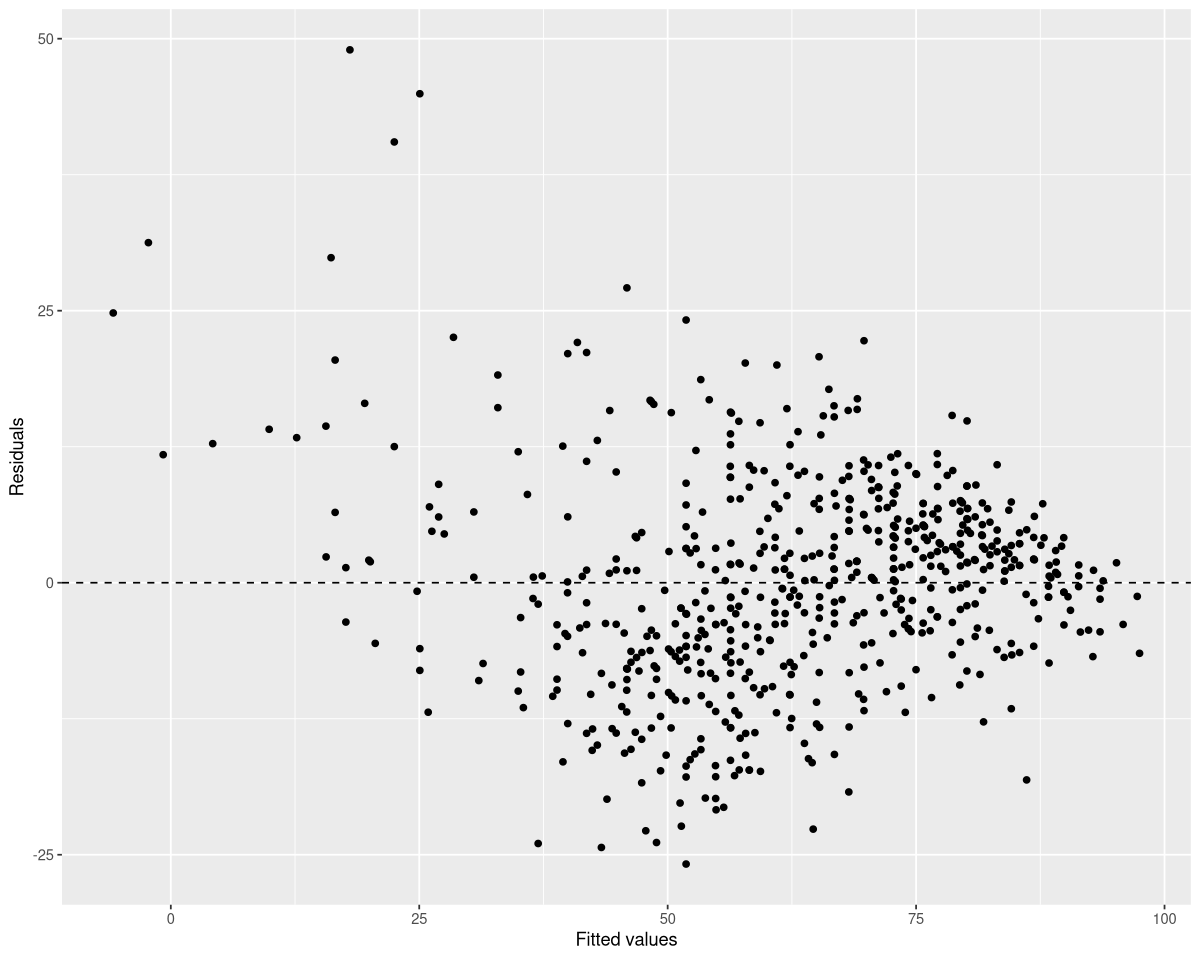

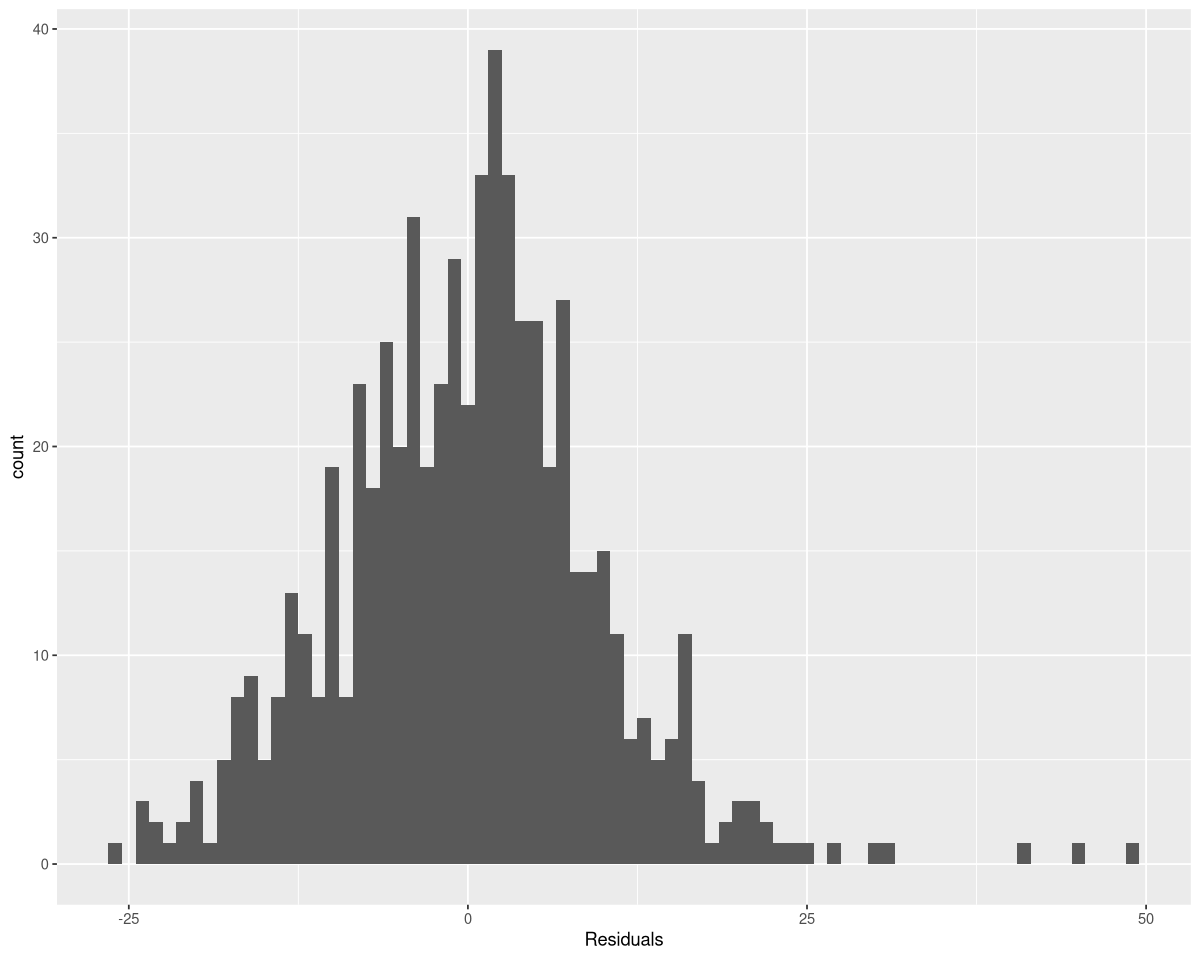

In [19]:
ggplot(data = m1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

ggplot(data = m1, aes(x = .resid)) +
  geom_histogram(binwidth = 1) +
  xlab("Residuals")

From the scatterplot of residuals, an slightly funnel shape is observed. This comes from the higher dispersion in the lower ratings, indicating less consense on movie ranking among spectators.

In the other hand, residuals are well distributed around 0, without noticeable skews to one side or the other.

We can assume, despite the funnel shape indicating not constant variability, that the conditions are met for a MLR model.

## Part 5: Prediction

Finally, let's pick a movie from 2006 outside the dataset to test the model predictiveness. We'll later determine uncertainty of the inference, but let's first check if the movie is included or not in the dataset.

In [20]:
any(movies_cln=="Zootopia")
any(movies_cln=="The Dish")

[1] NA

[1] TRUE

We've chosen `Zootopia` to perform the predictions. As a positive test, we have confirmed that the query is valid, looking for a movie we know it is already included in the dataset: `The Dish`.

Let's now make a model entry with the correspondent predictors for Zootopia. The inputs have been taken from [imdb.com](https://www.imdb.com/title/tt2948356/) and [Rotten Tomatoes](https://www.rottentomatoes.com/m/zootopia).

In [21]:
zootopia <- data.frame(genre = "Animation", imdb_rating = 8.0, critics_rating="Certified Fresh", best_actress_win="yes")

And now determine the fit value and the 95% confidence interval.

In [22]:
predict(m1, zootopia, interval = "prediction", level = 0.95)

,fit,lwr,upr
1,96.17644,75.60841,116.7445


As we can see in the summary table, we're 95% confindent that the true audience score value will be located in the interval around (75.6; 100). Even if the result shows a number higher than 100, this is not conceptually possible, given the scoring interval between (0,100).

Audience in [Rotten Tomatoes](https://www.rottentomatoes.com/m/zootopia) has ranked the movie with a score of 92%. The estimate is quite accurate and falls inside the 95% confidence interval, with a `predicted` (fit) value of 96%.

## Part 6: Conclusion

Conclusion not repetitive of earlier statements (1 pt)
Cohesive synthesis of findings that appropriate address the research question stated earlier (1 pt)
Discussion of shortcomings (1 pt)

## Acronyms

MLR: Multiple Linear Regression

## References

- [Rotten Tomatoes](https://www.rottentomatoes.com/m/zootopia)
- [IMDb](https://www.imdb.com/title/tt2948356/)